In [31]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [32]:
import networkx as nx
import matplotlib.pyplot as plt

# import networkx generators
import networkx.generators.small

# traversal algorithms
from networkx.algorithms import traversal


### The dataset below is a real-world bird social network available in this site - https://networkrepository.com/aves-wildbird-network-4.php
### Edge weight is calculated using the half weight index. This method mesures interaction strength between 2 nodes.  Data Collection is for 6 days. Time span within a day is 12 hours.Each network has social data collected within a 6 day time window.

### Citation (from the above website): Firth, Josh A., and Ben C. Sheldon. "Experimental manipulation of avian social structure reveals segregation is carried over across contexts." Proceedings of the Royal Society of London B: Biological Sciences 282.1802 (2015): 20142350.

### This study was interesting in that, the researchers used monitored wild birds through tags and allowing selective feeding to measure social segregation within the birds.  The reserchers used network metrics degree (number of connections per individual bird) and assortivity (preference to association of similar individuals) to review social structure.

In [33]:

# Read the edge list from the file
wildbird = nx.read_edgelist(
    r'C:\Users\Banu\Documents\GitHub\CUNY-DATA-620-WebAnalytics\Week3\aves-wildbird-network-4\aves-wildbird-network-4.edges', 
    nodetype=int, 
    data=(('weight', float),)  # Change int to float
)

# Print the number of nodes and edges to verify the graph was loaded correctly
print(f"Number of nodes: {wildbird.number_of_nodes()}")
print(f"Number of edges: {wildbird.number_of_edges()}")   
#nx.edges(wildbird) 

# Adjacency List
#[list(nx.neighbors(x)) for x in nx.nodes(wildbird)]

Number of nodes: 135
Number of edges: 2009


### when printing diameter, I get an error that the graph has infinite path length and that the graph is not connected so as per class, I am showing that error below.

Number of connected components: 2


'     # Connect the components by adding edges\n    for i in range(len(components) - 1):\n        # Get a node from the current component and the next component\n        node1 = list(components[i])[0]\n        node2 = list(components[i + 1])[0]\n        # Add an edge between these nodes\n        wildbird.add_edge(node1, node2)\n    print("Graph is now connected.") '

NetworkXError: Found infinite path length because the graph is not connected

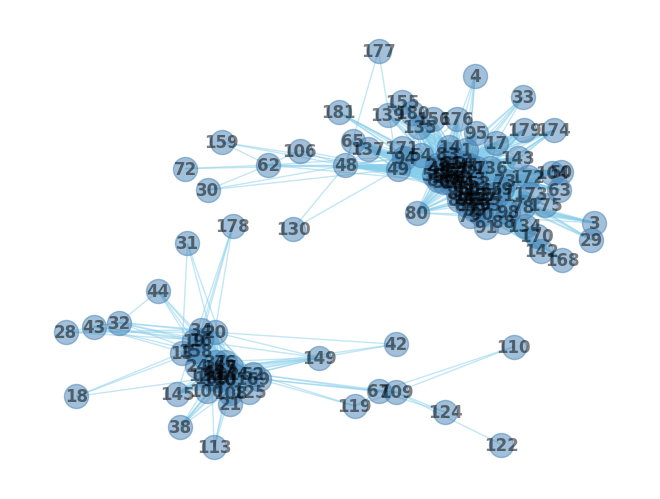

In [34]:

nx.draw(wildbird, with_labels=True, node_color="steelblue", node_size=300, font_weight='bold', 
        edge_color="skyblue", alpha=0.5)

 
# Check if the graph is connected
if not nx.is_connected(wildbird):
    # Find all connected components
    components = list(nx.connected_components(wildbird))
    print(f"Number of connected components: {len(components)}")
    
"""     # Connect the components by adding edges
    for i in range(len(components) - 1):
        # Get a node from the current component and the next component
        node1 = list(components[i])[0]
        node2 = list(components[i + 1])[0]
        # Add an edge between these nodes
        wildbird.add_edge(node1, node2)
    print("Graph is now connected.") """

# Calculate the diameter of the graph
diameter = nx.diameter(wildbird)
print(f"Diameter of the graph: {diameter}")


### I was trying to understand which nodes were isolated since I got an error above in identifying the diameter, however, the isolates function returned null list.
### Density of the graph 0.22 indicates that the network is relatively spase with limited interactions with the birds.

In [ ]:

# Find isolated nodes
isolated_nodes = list(nx.isolates(wildbird))
print(f"Isolated nodes: {isolated_nodes}")

# Find all connected components
components = list(nx.connected_components(wildbird))
print(f"Number of connected components: {len(components)}")

print(components)

# Calculate the density of the graph
density = nx.density(wildbird)
print(f"Density of the graph: {density}")

Isolated nodes: []
Number of connected components: 2
[{1, 2, 3, 4, 6, 7, 9, 10, 11, 12, 14, 15, 17, 22, 23, 25, 26, 29, 30, 33, 35, 40, 41, 48, 49, 50, 54, 55, 56, 58, 59, 60, 61, 62, 63, 64, 65, 72, 73, 74, 76, 77, 78, 79, 80, 82, 83, 84, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 97, 98, 99, 104, 106, 130, 132, 133, 134, 135, 136, 137, 139, 141, 142, 143, 153, 155, 156, 157, 159, 164, 166, 168, 170, 171, 172, 173, 174, 175, 176, 177, 179, 180, 181}, {5, 140, 13, 16, 144, 145, 19, 20, 149, 21, 18, 24, 28, 158, 31, 32, 34, 37, 165, 167, 38, 42, 43, 44, 45, 46, 178, 52, 67, 69, 100, 101, 102, 108, 109, 110, 113, 119, 122, 124, 125, 126}]
Density of the graph: 0.22211166390270867


In [ ]:

# Let's find adjacency list
adjacency_list = {node: list(wildbird.neighbors(node)) for node in wildbird.nodes()}

# Display the adjacency list
print("Adjacency List:")
for node, neighbors in adjacency_list.items():
    print(f"{node}: {neighbors}")

Adjacency List:
132: [1, 2, 170, 73, 7, 9, 74, 10, 11, 12, 98, 15, 77, 153, 87, 78, 79, 141, 54, 64, 56, 171, 82, 55, 35, 58, 172, 22, 23, 84, 59, 26, 6, 86, 40, 164, 166, 89, 90, 61, 133, 91, 88, 92, 173, 93, 94, 49, 25, 60, 174, 143, 136, 97, 41, 76, 157, 99]
1: [132, 2, 6, 7, 9, 74, 10, 11, 49, 14, 76, 15, 153, 175, 64, 141, 54, 55, 84, 56, 58, 22, 23, 17, 26, 86, 87, 164, 166, 89, 176, 61, 133, 94, 139, 25, 12, 40, 41]
2: [132, 1, 50, 63, 65, 56, 23, 25, 26, 133, 35, 40, 97, 41, 157, 73, 7, 9, 74, 10, 11, 12, 14, 15, 77, 179, 153, 17, 64, 80, 54, 55, 171, 82, 83, 58, 172, 22, 48, 6, 86, 87, 164, 166, 89, 33, 59, 61, 92, 137, 94, 49, 95, 136, 60, 174, 143]
170: [132, 90, 88, 79, 89, 92, 82, 87, 76, 99, 153, 93, 84, 78, 26, 157]
73: [132, 63, 56, 23, 25, 26, 90, 133, 35, 40, 97, 41, 173, 157, 2, 6, 7, 9, 74, 10, 11, 14, 76, 15, 77, 153, 87, 78, 79, 141, 59, 64, 55, 82, 83, 58, 172, 22, 86, 164, 166, 89, 61, 91, 92, 93, 84, 60, 143, 99]
7: [132, 1, 50, 63, 56, 23, 25, 26, 133, 35, 40,

### Include and update DFS traversal


In [ ]:
def DFS_nodes(graph, node, visited=None):
    """
    Simple DFS implementation for graph traversal of Nodes
    """
    if not visited:
        visited = []
    visited.append(node)
    for neighbor in graph[node]:
        if not neighbor in visited:
            DFS_nodes(graph, neighbor, visited)
    return visited


def DFS_edges(graph, node, visited=[], edges=None):
    """
    Simple DFS implementation for graph traversal of edges
    """
    if not edges:
        edges = []
    visited.append(node)
    for ni in graph[node]:
        if not ni in visited:
            edges.append((node, ni))
            DFS_edges(graph, ni, visited, edges)
    return edges

In [ ]:
DFS_nodes(wildbird, 6)
DFS_edges(wildbird, 6)

[6,
 132,
 1,
 2,
 50,
 86,
 65,
 49,
 159,
 62,
 72,
 48,
 177,
 23,
 63,
 73,
 56,
 3,
 97,
 25,
 4,
 11,
 26,
 170,
 90,
 9,
 133,
 7,
 35,
 74,
 40,
 10,
 41,
 12,
 173,
 98,
 157,
 77,
 14,
 135,
 89,
 104,
 60,
 33,
 61,
 164,
 76,
 153,
 166,
 175,
 22,
 155,
 58,
 99,
 91,
 87,
 143,
 15,
 95,
 55,
 136,
 92,
 80,
 79,
 78,
 141,
 59,
 64,
 137,
 54,
 180,
 156,
 94,
 171,
 176,
 179,
 17,
 83,
 84,
 134,
 82,
 93,
 172,
 142,
 88,
 168,
 29,
 174,
 181,
 139,
 130,
 106,
 30]

[(6, 132),
 (132, 1),
 (1, 2),
 (2, 50),
 (50, 86),
 (86, 65),
 (65, 49),
 (49, 159),
 (159, 62),
 (62, 72),
 (72, 48),
 (48, 177),
 (48, 23),
 (23, 63),
 (63, 73),
 (73, 56),
 (56, 3),
 (3, 97),
 (97, 25),
 (25, 4),
 (4, 11),
 (11, 26),
 (26, 170),
 (170, 90),
 (90, 9),
 (9, 133),
 (133, 7),
 (7, 35),
 (35, 74),
 (74, 40),
 (40, 10),
 (10, 41),
 (41, 12),
 (12, 173),
 (173, 98),
 (98, 157),
 (157, 77),
 (77, 14),
 (14, 135),
 (135, 89),
 (89, 104),
 (104, 60),
 (60, 33),
 (33, 61),
 (61, 164),
 (164, 76),
 (76, 153),
 (153, 166),
 (166, 175),
 (175, 22),
 (22, 155),
 (155, 58),
 (58, 99),
 (99, 91),
 (91, 87),
 (87, 143),
 (143, 15),
 (15, 95),
 (95, 55),
 (55, 136),
 (136, 92),
 (92, 80),
 (80, 79),
 (79, 78),
 (78, 141),
 (141, 59),
 (59, 64),
 (64, 137),
 (137, 54),
 (54, 180),
 (54, 156),
 (54, 94),
 (94, 171),
 (54, 176),
 (64, 179),
 (64, 17),
 (64, 83),
 (83, 84),
 (84, 134),
 (134, 82),
 (82, 93),
 (93, 172),
 (93, 142),
 (142, 88),
 (142, 168),
 (64, 29),
 (55, 174),
 (55, 18

### Here' from chapter 2 I wanted to look at the traversal tree of Breadth first search traversal. This starts with node 6 and explores all the the neighbor nodes at the present depth level before moving to the nodes at the next depth level. 

{6: [132,
  1,
  50,
  65,
  56,
  23,
  25,
  26,
  90,
  133,
  35,
  40,
  97,
  41,
  157,
  2,
  135,
  73,
  7,
  9,
  11,
  12,
  14,
  76,
  77,
  175,
  86,
  164,
  166,
  89,
  60,
  61,
  91,
  143,
  99,
  137,
  95,
  136,
  174,
  4,
  74,
  10,
  15,
  176,
  179,
  153,
  17,
  64,
  79,
  54,
  139,
  55,
  181,
  84,
  82,
  83,
  58,
  172,
  22,
  48,
  87,
  29,
  59,
  93,
  94,
  49,
  80,
  171,
  92,
  180,
  134],
 132: [170, 98, 78, 141, 88, 173],
 56: [3, 104, 33],
 23: [63, 156],
 25: [155],
 26: [142, 168],
 35: [62],
 48: [72, 159, 177, 130, 106, 30]}

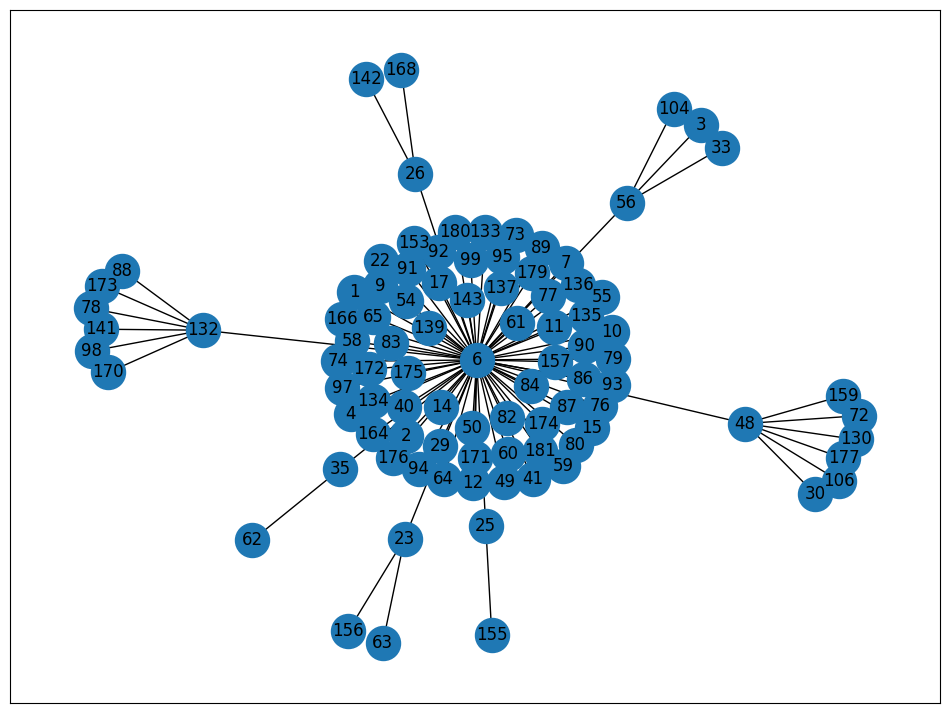

In [ ]:
bfs_tree = {n: succ for n,succ in traversal.bfs_successors(wildbird, 6)}
bfs_tree

fig, ax = plt.subplots(figsize=(12, 9))
nx.draw_networkx(nx.from_dict_of_lists(bfs_tree),  ax=ax, node_size=600)

### The bird with the highest degree centrality is: 6
### Highest Degree Centrality value: 0.5298507462686567

In [ ]:
import pandas as pd  # Import pandas
# Calculate network metrics
degree_centrality = nx.degree_centrality(wildbird)
betweenness_centrality = nx.betweenness_centrality(wildbird)
closeness_centrality = nx.closeness_centrality(wildbird)
eigenvector_centrality = nx.eigenvector_centrality(wildbird)
clustering_coefficient = nx.clustering(wildbird)

metrics_df = pd.DataFrame({
    'Node': list(wildbird.nodes()),
    'Degree Centrality': [degree_centrality[node] for node in wildbird.nodes()],
    'Betweenness Centrality': [betweenness_centrality[node] for node in wildbird.nodes()],
    'Closeness Centrality': [closeness_centrality[node] for node in wildbird.nodes()],
    'Eigenvector Centrality': [eigenvector_centrality[node] for node in wildbird.nodes()],
    'Clustering Coefficient': [clustering_coefficient[node] for node in wildbird.nodes()]
})

metrics_df.set_index('Node', inplace=True)
metrics_df

most_interacted_bird = metrics_df['Degree Centrality'].idxmax()
highest_degree_centrality = metrics_df['Degree Centrality'].max()

print(f"The bird with the highest degree centrality is: {most_interacted_bird}")
print(f"Highest Degree Centrality value: {highest_degree_centrality}")

,Degree Centrality,Betweenness Centrality,Closeness Centrality,Eigenvector Centrality,Clustering Coefficient
Node,,,,,
132,0.432836,0.00342,0.497356,1.453703e-01,0.739262
1,0.291045,0.00212,0.432631,1.004096e-01,0.794872
2,0.425373,0.00613,0.497356,1.350047e-01,0.674185
170,0.119403,0.00000,0.335980,4.064962e-02,1.000000
73,0.373134,0.00144,0.451173,1.312903e-01,0.812245
...,...,...,...,...,...
124,0.014925,0.00000,0.101990,1.962779e-08,1.000000
110,0.014925,0.00000,0.101990,1.962779e-08,1.000000
130,0.014925,0.00000,0.287110,3.856961e-03,1.000000


The bird with the highest degree centrality is: 6
Highest Degree Centrality value: 0.5298507462686567


### Code below is from chapter 3 sample from book applied to wildbird.

In [ ]:
deg = wildbird.degree
d = dict(deg)

print(f"Minimum degree {min(d.values())}")
print(f"Maximum degree {max(d.values())}")

Minimum degree 1
Maximum degree 71


In [ ]:
### This function returns a sorted degree list -- useful for celebrity-spotting
def sorted_map(dd: dict) -> dict:
    """
    Sorts dict by its values (desc)
    
    :param dd: dictionary with numeric values
    :return sorted dictionary ordered by its numeric value
    """
    sorted_dict = sorted(dd.items(), key=lambda x: (-x[1], x[0]))
    return sorted_dict

[(6, 71),
 (89, 68),
 (26, 66),
 (60, 65),
 (97, 65),
 (9, 64),
 (133, 64),
 (56, 63),
 (58, 63)]

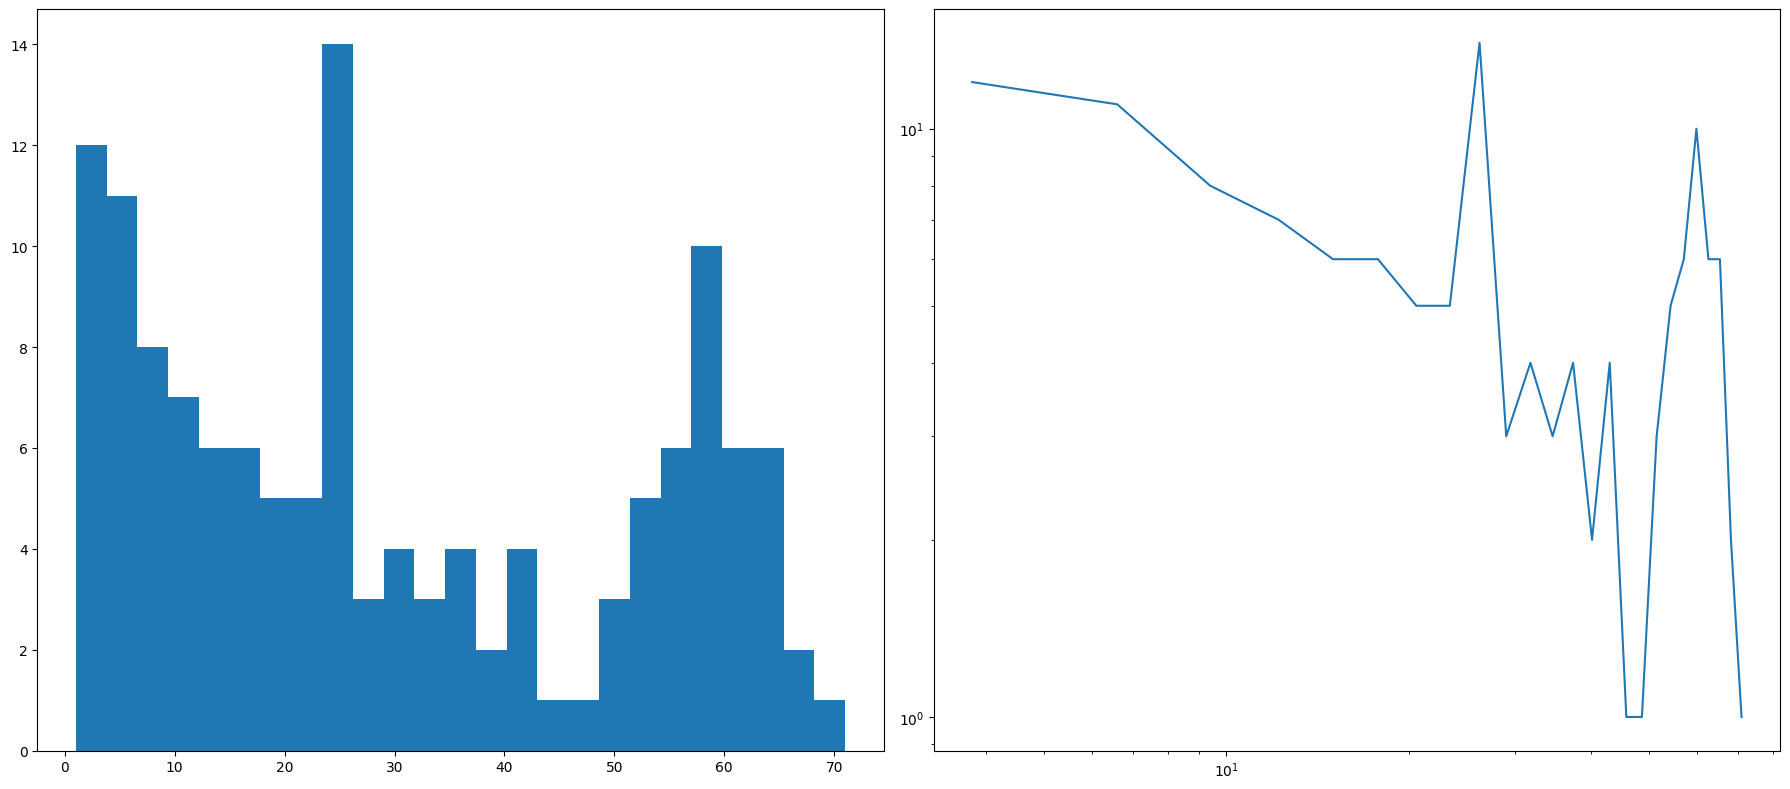

In [ ]:
# get all the nodes sorted by highest degree
ds = sorted_map(d)

# let's see top 10
ds[:9]

fig, ax = plt.subplots(1, 2, tight_layout=True, figsize=(18, 8))

# display a histogram of node degrees in 100 bins
h = ax[0].hist(d.values(), 25)

# plot the same histogram in Log-Log space
ax[1].loglog(h[1][1:], h[0])

### Analyze birds with largest number of connections

In [ ]:
def trim_degrees(g: nx.Graph, degree: int=1) -> nx.Graph:
    """
    Return a new graph object that contains the network with pendant and isolated nodes removed
    
    :param g: Graph
    :param degree: 
    """
    g2 = g.copy()
    d = g2.degree
    for n in g.nodes():
        if d[n] <= degree: 
            g2.remove_node(n)
            
    return g2

In [ ]:
core = trim_degrees(wildbird)
print(f"Number of nodes in Graph with 1 or more connections/degrees = {len(core):,}")

core2 = trim_degrees(wildbird, degree=2)
print(f"Number of nodes in Graph with 2 or more connections/degrees = {len(core2):,}")

core3 = trim_degrees(wildbird, degree=3)
print(f"Number of nodes in Graph with 3 or more connections/degrees = {len(core3):,}")

core10 = trim_degrees(wildbird, degree=10)
print(f"Number of nodes in Graph with 10 or more connections/degrees = {len(core10):,}")

Number of nodes in Graph with 1 or more connections/degrees = 134
Number of nodes in Graph with 2 or more connections/degrees = 129
Number of nodes in Graph with 3 or more connections/degrees = 123
Number of nodes in Graph with 10 or more connections/degrees = 101


[(89, 0.6696428571428572),
 (6, 0.6617647058823529),
 (26, 0.6540697674418605),
 (133, 0.6540697674418605),
 (9, 0.646551724137931),
 (60, 0.646551724137931),
 (97, 0.646551724137931),
 (58, 0.6392045454545454),
 (11, 0.625),
 (56, 0.625)]

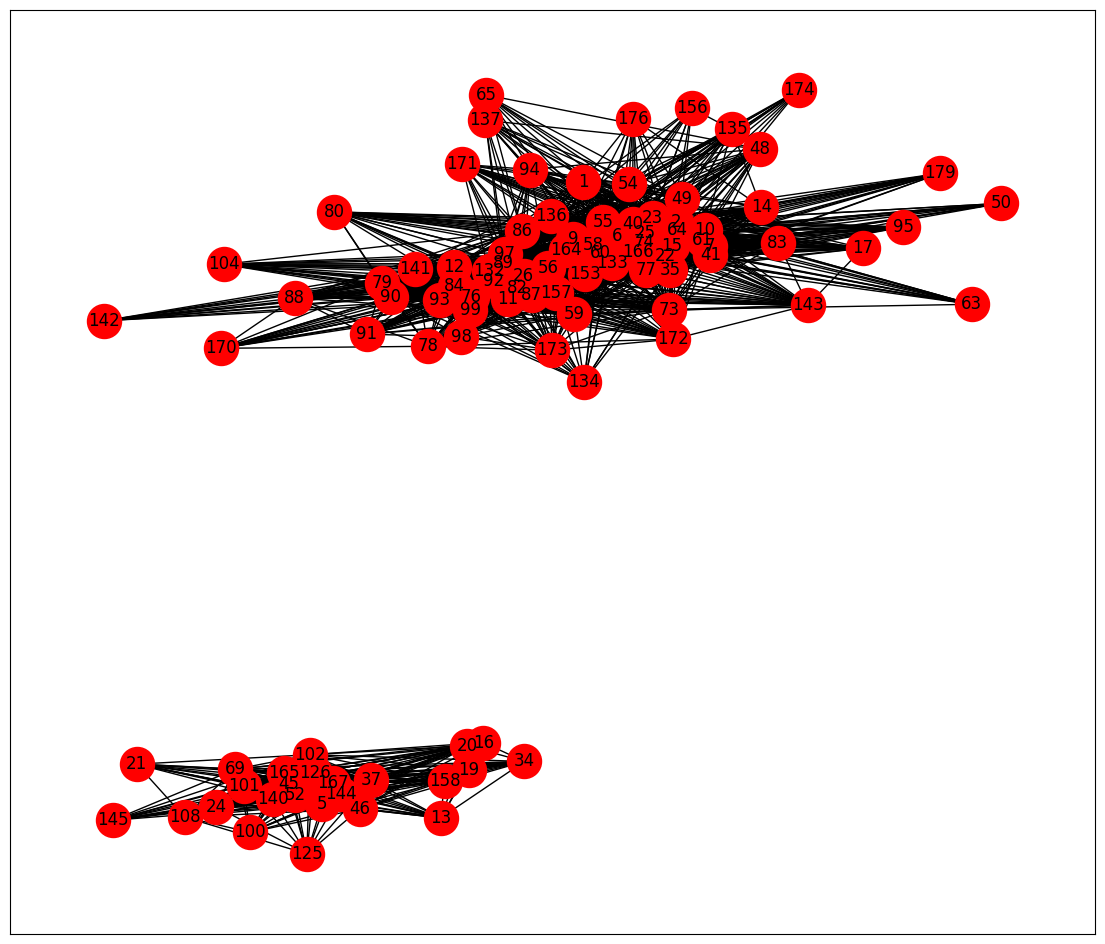

In [ ]:
fig, ax = plt.subplots(figsize=(14, 12))
nx.draw_networkx(core10,  ax=ax, node_size=600, node_color='red')
c = nx.closeness_centrality(core10)
# Sort the results using a function from previous section
cs = sorted_map(c)

# top 10 birds with 10 or more connections
cs[:10]

### Plotting the histogram of birds with top 10 centraility, we can see that X axis shows the centrality values of the Core10 dataset which is the collection of all birds with degree 10 in the network and their closeness centraility values in the network. Here Y axis is frequency of the nodes that have # of connections 10 or more and their distribution centrality values. There are more than 30 birds that share similar closeness centrality values more than 0.6 

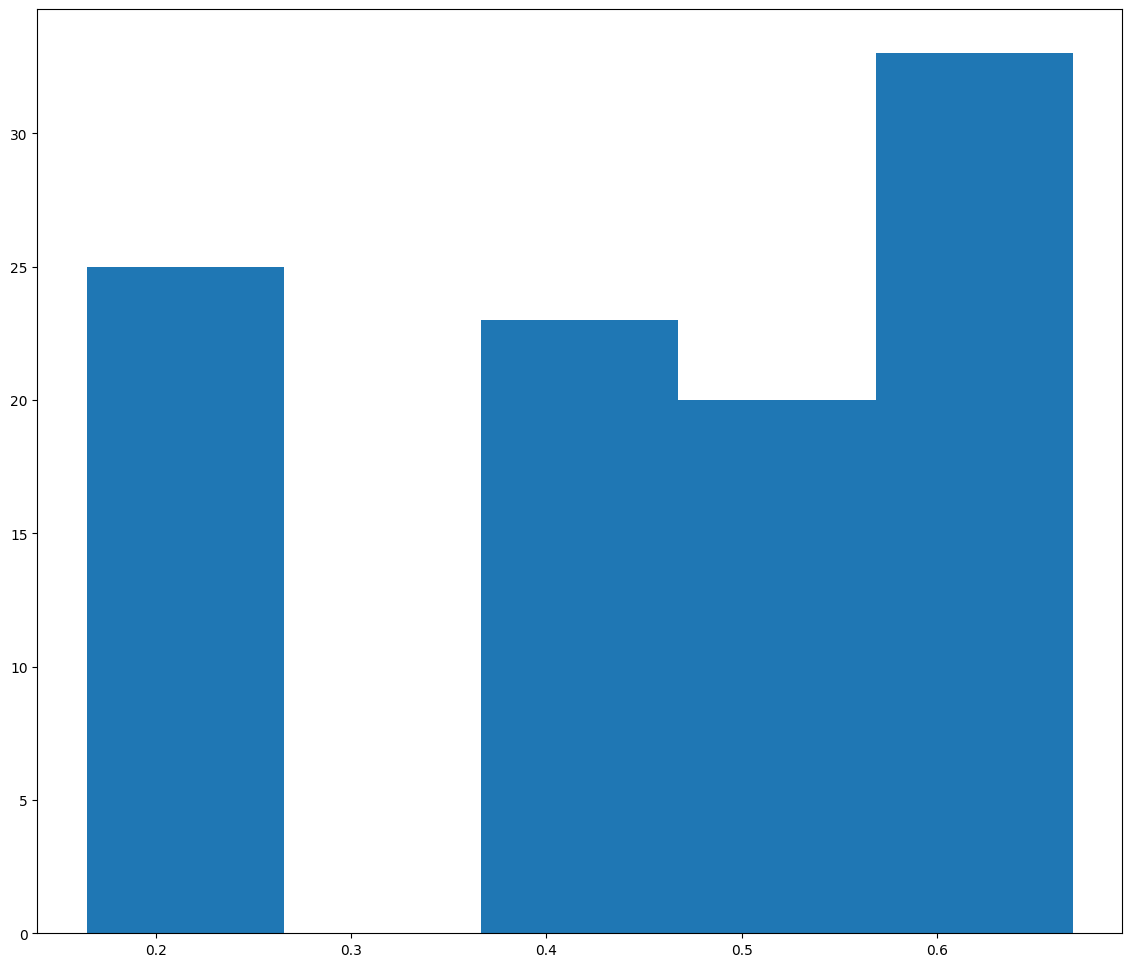

In [ ]:
fig, ax = plt.subplots(figsize=(14, 12))
h = ax.hist(c.values(), 5)

### Evaluate betweenness centrality with network for top 10 degree connection birds
Build a table of elite group
|Metric      |Low Degree |Low Closeness |Low Betweenness |
|------------|-----------|--------------|----------------|      
|High Degree |           |Bird is embedded in a cluster that is far from the rest of the network|Bird's connections are redundant|
|High Closeness|Bird is influential and Key player tied to important or active others| |This bird is in a dense, active cluster at the center of events—with many others|

In [ ]:
b = nx.betweenness_centrality(nx.Graph(core10))
bs = sorted_map(b)
bs[:10]

top10_names_dc = [x[0] for x in ds[:10]]
top10_names_cc = [x[0] for x in cs[:10]]
top10_names_bc = [x[0] for x in bs[:10]]

## use Python sets to compute a union of the sets
names = list(set(top10_names_dc) | set(top10_names_cc) | set (top10_names_bc))

## build a table with centralities
table = pd.DataFrame(
    {
        "Name": names,
        "Degree": [d[name] for name in names],
        "Closeness": [c[name] for name in names],
        "Betweenness": [b[name] for name in names]
    }, columns=["Name", "Degree", "Closeness", "Betweenness"]
)
table

[(60, 0.013490511497474204),
 (89, 0.013171982484440988),
 (6, 0.013011953441664179),
 (86, 0.009826739334085587),
 (26, 0.009767807876098898),
 (58, 0.009342854630158218),
 (97, 0.009221901295394084),
 (133, 0.00846640213109899),
 (9, 0.008151768287578503),
 (22, 0.007699245400081251)]

,Name,Degree,Closeness,Betweenness
0,133,64,0.654070,0.008466
1,6,71,0.661765,0.013012
2,9,64,0.646552,0.008152
3,11,62,0.625000,0.006050
4,86,62,0.625000,0.009827
5,22,62,0.618132,0.007699
6,89,68,0.669643,0.013172
7,26,66,0.654070,0.009768
8,97,65,0.646552,0.009222
9,56,63,0.625000,0.005913


### Here' only 2 connected components were identified, which means there wildbird network is divided into 2 distinct subgraphs where there are no edges connecting nodes from one sugraph to nodes in another subgraph. So, there are 2 separate groups of brids that are internally connected however they do not have connections between the groups. 

<Figure size 1500x1500 with 0 Axes>

{132: Text(-0.05274460862596448, 0.28165315718266837, '132'),
 1: Text(-0.19426452690605053, 0.41119789357693015, '1'),
 2: Text(0.457197318573958, 0.5005809555417212, '2'),
 170: Text(-0.8781633178605657, 0.2246509037253412, '170'),
 73: Text(0.14067369818024902, 0.632476532053441, '73'),
 7: Text(0.44063858587264376, 0.30921917643852714, '7'),
 9: Text(0.17144024595790344, 0.17388754667050782, '9'),
 74: Text(0.330346761459138, 0.41249917396614155, '74'),
 10: Text(0.30360346415486505, 0.1674456952803749, '10'),
 11: Text(-0.24322658570369224, 0.48069901025863426, '11'),
 12: Text(-0.16931260893440087, 0.09869455934942184, '12'),
 98: Text(0.5455063586397869, 0.14815628485626797, '98'),
 15: Text(0.2863833548872059, 0.23272460461175873, '15'),
 77: Text(-0.07690341032844458, 0.1885196609657079, '77'),
 153: Text(0.01737220022032338, 0.33869867889591915, '153'),
 87: Text(-0.21397467252419305, 0.29258237572627294, '87'),
 78: Text(0.16256755755792476, -0.2622961898945379, '78'),
 79: 

Text(0.5, 1.0, 'Wildbird Network Graph - Connected Components')

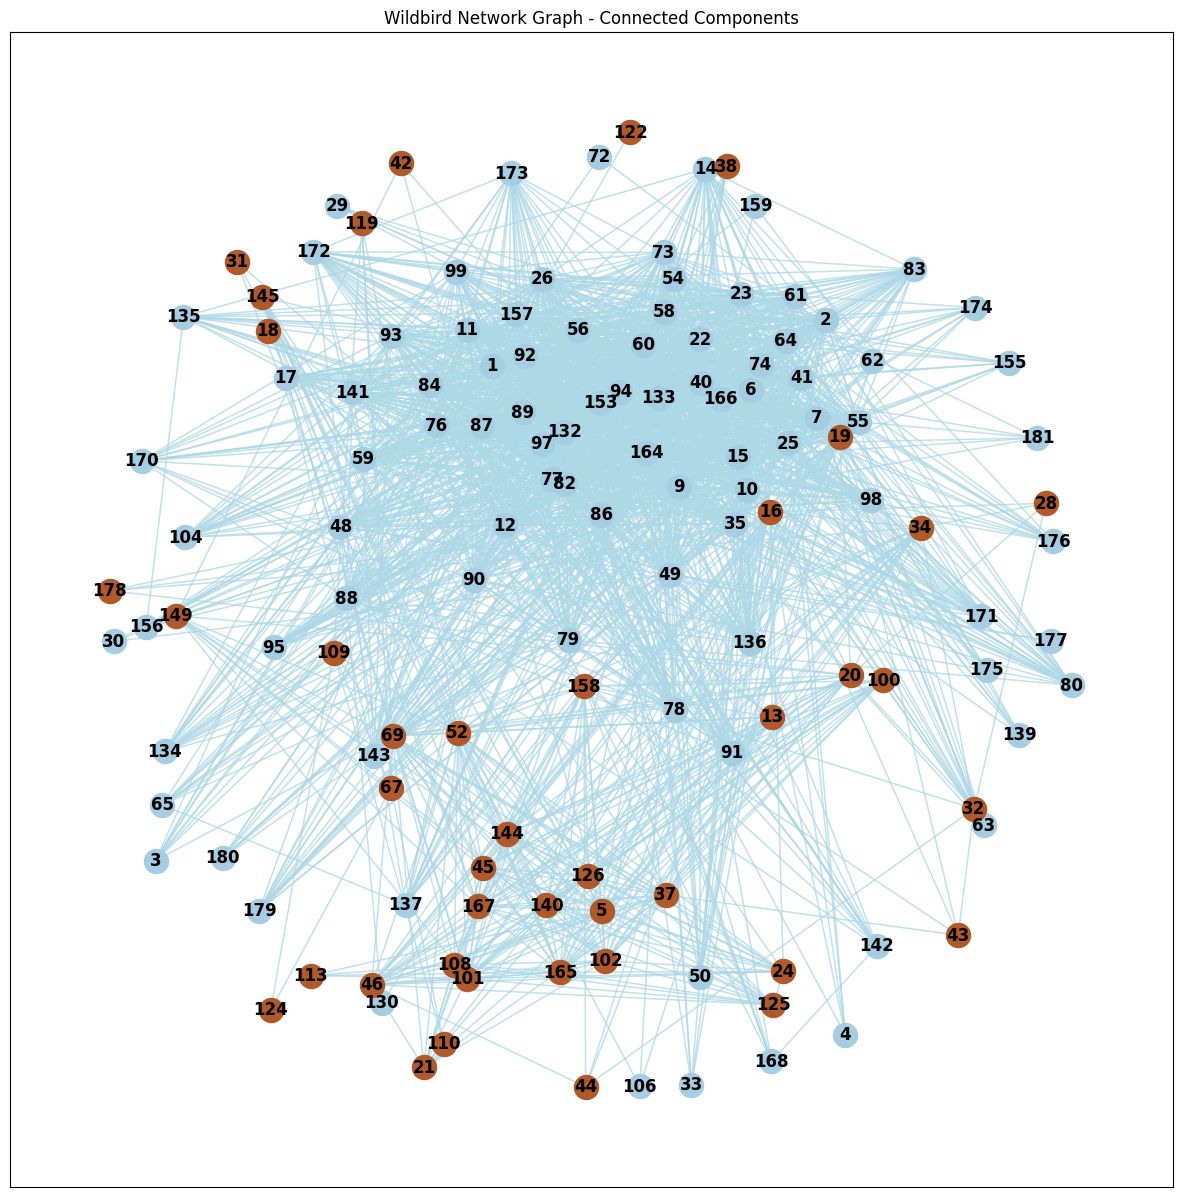

In [ ]:
import numpy as np  # Import numpy
pos = nx.spring_layout(wildbird, k=0.5)  # Adjust k to spread nodes further apart
plt.figure(figsize=(15, 15))  # Increase the figure size

colors = plt.cm.Paired(np.linspace(0, 1, len(components)))
    
for i, component in enumerate(components):
    nx.draw_networkx_nodes(wildbird, pos, nodelist=component, node_color=[colors[i]], node_size=300)
    nx.draw_networkx_edges(wildbird, pos, edgelist=[(u, v) for u in component for v in wildbird.neighbors(u) if v in component], edge_color='lightblue', alpha=0.5)
    
nx.draw_networkx_labels(wildbird, pos, font_weight='bold')
plt.title("Wildbird Network Graph - Connected Components")
plt.show()

<Figure size 1000x1000 with 0 Axes>

Text(0.5, 1.0, 'Subgraph of Bird 6 and Its Neighbors')

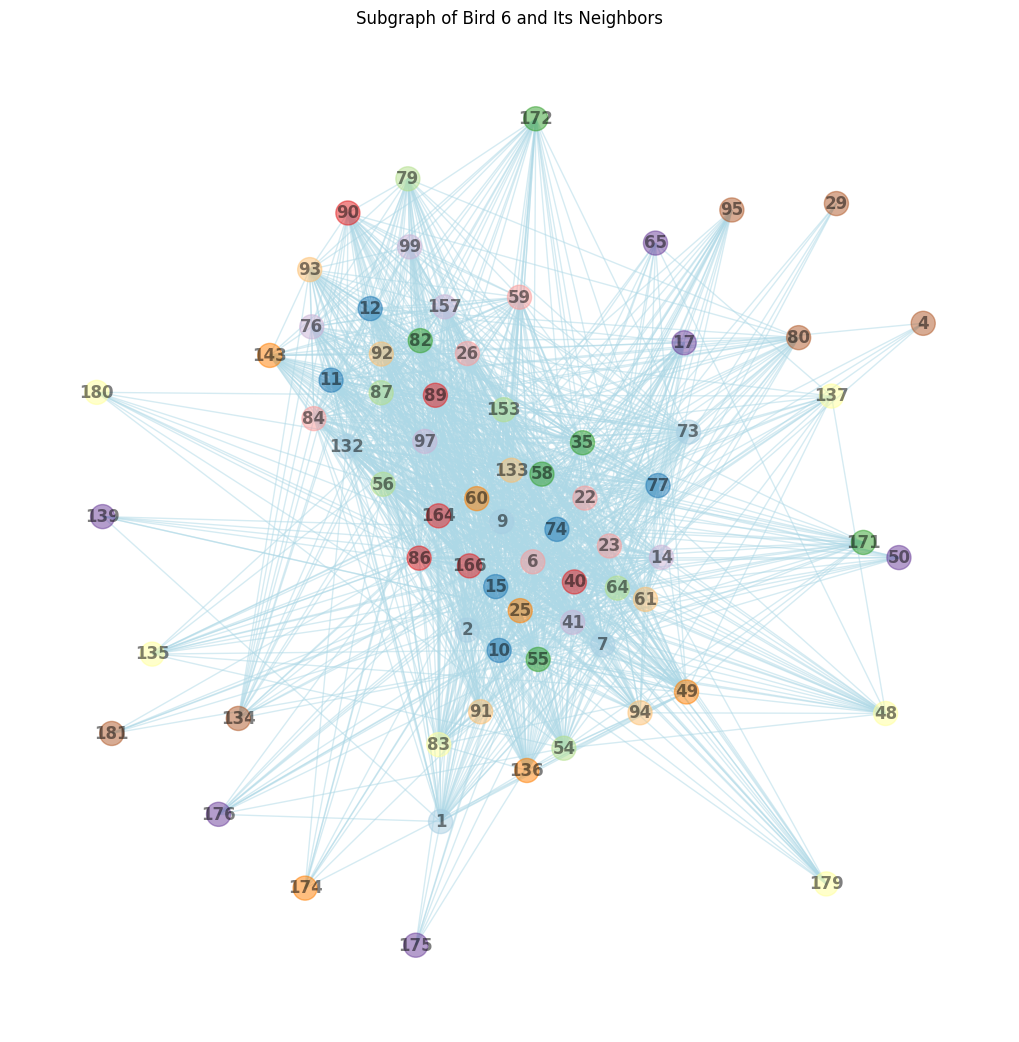

' print("Connections in the subgraph:")\nfor node in subgraph_nodes:\n    for neighbor in wildbird.neighbors(node):\n        if neighbor in subgraph_nodes:\n            print(f"Bird {node} is connected to Bird {neighbor}") '

In [ ]:
# Select the bird and its neighbors for the subgraph (e.g., bird 6)
bird = 6
neighbors = list(wildbird.neighbors(bird))
subgraph_nodes = [bird] + neighbors


subgraph = wildbird.subgraph(subgraph_nodes)
pos = nx.spring_layout(subgraph, k=0.5)  # Adjust k to spread nodes further apart
plt.figure(figsize=(10, 10))  # Increase the figure size


colors = plt.cm.Paired(np.linspace(0, 1, len(subgraph_nodes)))

nx.draw(subgraph, pos, with_labels=True, node_color=colors, node_size=300, font_weight='bold', 
        edge_color='lightblue', alpha=0.5)
plt.title(f"Subgraph of Bird {bird} and Its Neighbors")
plt.show()

# Print connections
""" print("Connections in the subgraph:")
for node in subgraph_nodes:
    for neighbor in wildbird.neighbors(node):
        if neighbor in subgraph_nodes:
            print(f"Bird {node} is connected to Bird {neighbor}") """

### Gray Cardinal: Bird 89 , A (bird) that has significant influence or control within the network, despite not being immediately obvious or prominent.

In [ ]:
# Find the top 5 birds for each measure
top_5_degree = metrics_df.nlargest(5, 'Degree Centrality')
top_5_betweenness = metrics_df.nlargest(5, 'Betweenness Centrality')
top_5_closeness = metrics_df.nlargest(5, 'Closeness Centrality')
top_5_eigenvector = metrics_df.nlargest(5, 'Eigenvector Centrality')
top_5_clustering = metrics_df.nlargest(5, 'Clustering Coefficient')

# Print the top 5 birds for each measure
print("Top 5 birds based on Degree Centrality:")
top_5_degree
print("\nTop 5 birds based on Betweenness Centrality:")
top_5_betweenness
print("\nTop 5 birds based on Closeness Centrality:")
top_5_closeness
print("\nTop 5 birds based on Eigenvector Centrality:")
top_5_eigenvector
print("\nTop 5 birds based on Clustering Coefficient:")
top_5_clustering

Top 5 birds based on Degree Centrality:


,Degree Centrality,Betweenness Centrality,Closeness Centrality,Eigenvector Centrality,Clustering Coefficient
Node,,,,,
6,0.529851,0.020856,0.558975,0.153512,0.543260
89,0.507463,0.010701,0.539865,0.155116,0.605795
26,0.492537,0.009303,0.530791,0.153930,0.635431
60,0.485075,0.012930,0.530791,0.148663,0.610096
97,0.485075,0.009694,0.530791,0.151727,0.636538



Top 5 birds based on Betweenness Centrality:


,Degree Centrality,Betweenness Centrality,Closeness Centrality,Eigenvector Centrality,Clustering Coefficient
Node,,,,,
49,0.395522,0.038271,0.482169,0.121523,0.633527
48,0.238806,0.024609,0.412838,0.066554,0.566532
6,0.529851,0.020856,0.558975,0.153512,0.543260
52,0.216418,0.014152,0.236694,0.000002,0.615764
60,0.485075,0.012930,0.530791,0.148663,0.610096



Top 5 birds based on Closeness Centrality:


,Degree Centrality,Betweenness Centrality,Closeness Centrality,Eigenvector Centrality,Clustering Coefficient
Node,,,,,
6,0.529851,0.020856,0.558975,0.153512,0.543260
89,0.507463,0.010701,0.539865,0.155116,0.605795
26,0.492537,0.009303,0.530791,0.153930,0.635431
60,0.485075,0.012930,0.530791,0.148663,0.610096
97,0.485075,0.009694,0.530791,0.151727,0.636538



Top 5 birds based on Eigenvector Centrality:


,Degree Centrality,Betweenness Centrality,Closeness Centrality,Eigenvector Centrality,Clustering Coefficient
Node,,,,,
89,0.507463,0.010701,0.539865,0.155116,0.605795
133,0.477612,0.006014,0.526368,0.154297,0.678075
26,0.492537,0.009303,0.530791,0.153930,0.635431
6,0.529851,0.020856,0.558975,0.153512,0.543260
9,0.477612,0.006549,0.526368,0.152969,0.665675



Top 5 birds based on Clustering Coefficient:


,Degree Centrality,Betweenness Centrality,Closeness Centrality,Eigenvector Centrality,Clustering Coefficient
Node,,,,,
170,0.119403,0.0,0.335980,0.040650,1.0
171,0.164179,0.0,0.387510,0.062385,1.0
174,0.082090,0.0,0.363013,0.032862,1.0
175,0.052239,0.0,0.327276,0.019251,1.0
176,0.097015,0.0,0.345159,0.035088,1.0


### We can analyze shortest paths for bird six that has highest degree centrality. 

Top 5 nodes with the shortest paths from node 6:
    Node  Shortest Path Length
72   170                     2
73    98                     2
74    78                     2
75   141                     2
76    88                     2


<Figure size 1500x1500 with 0 Axes>

Text(0.5, 1.0, 'Shortest Paths from Node 6 to Top 5 Nodes')

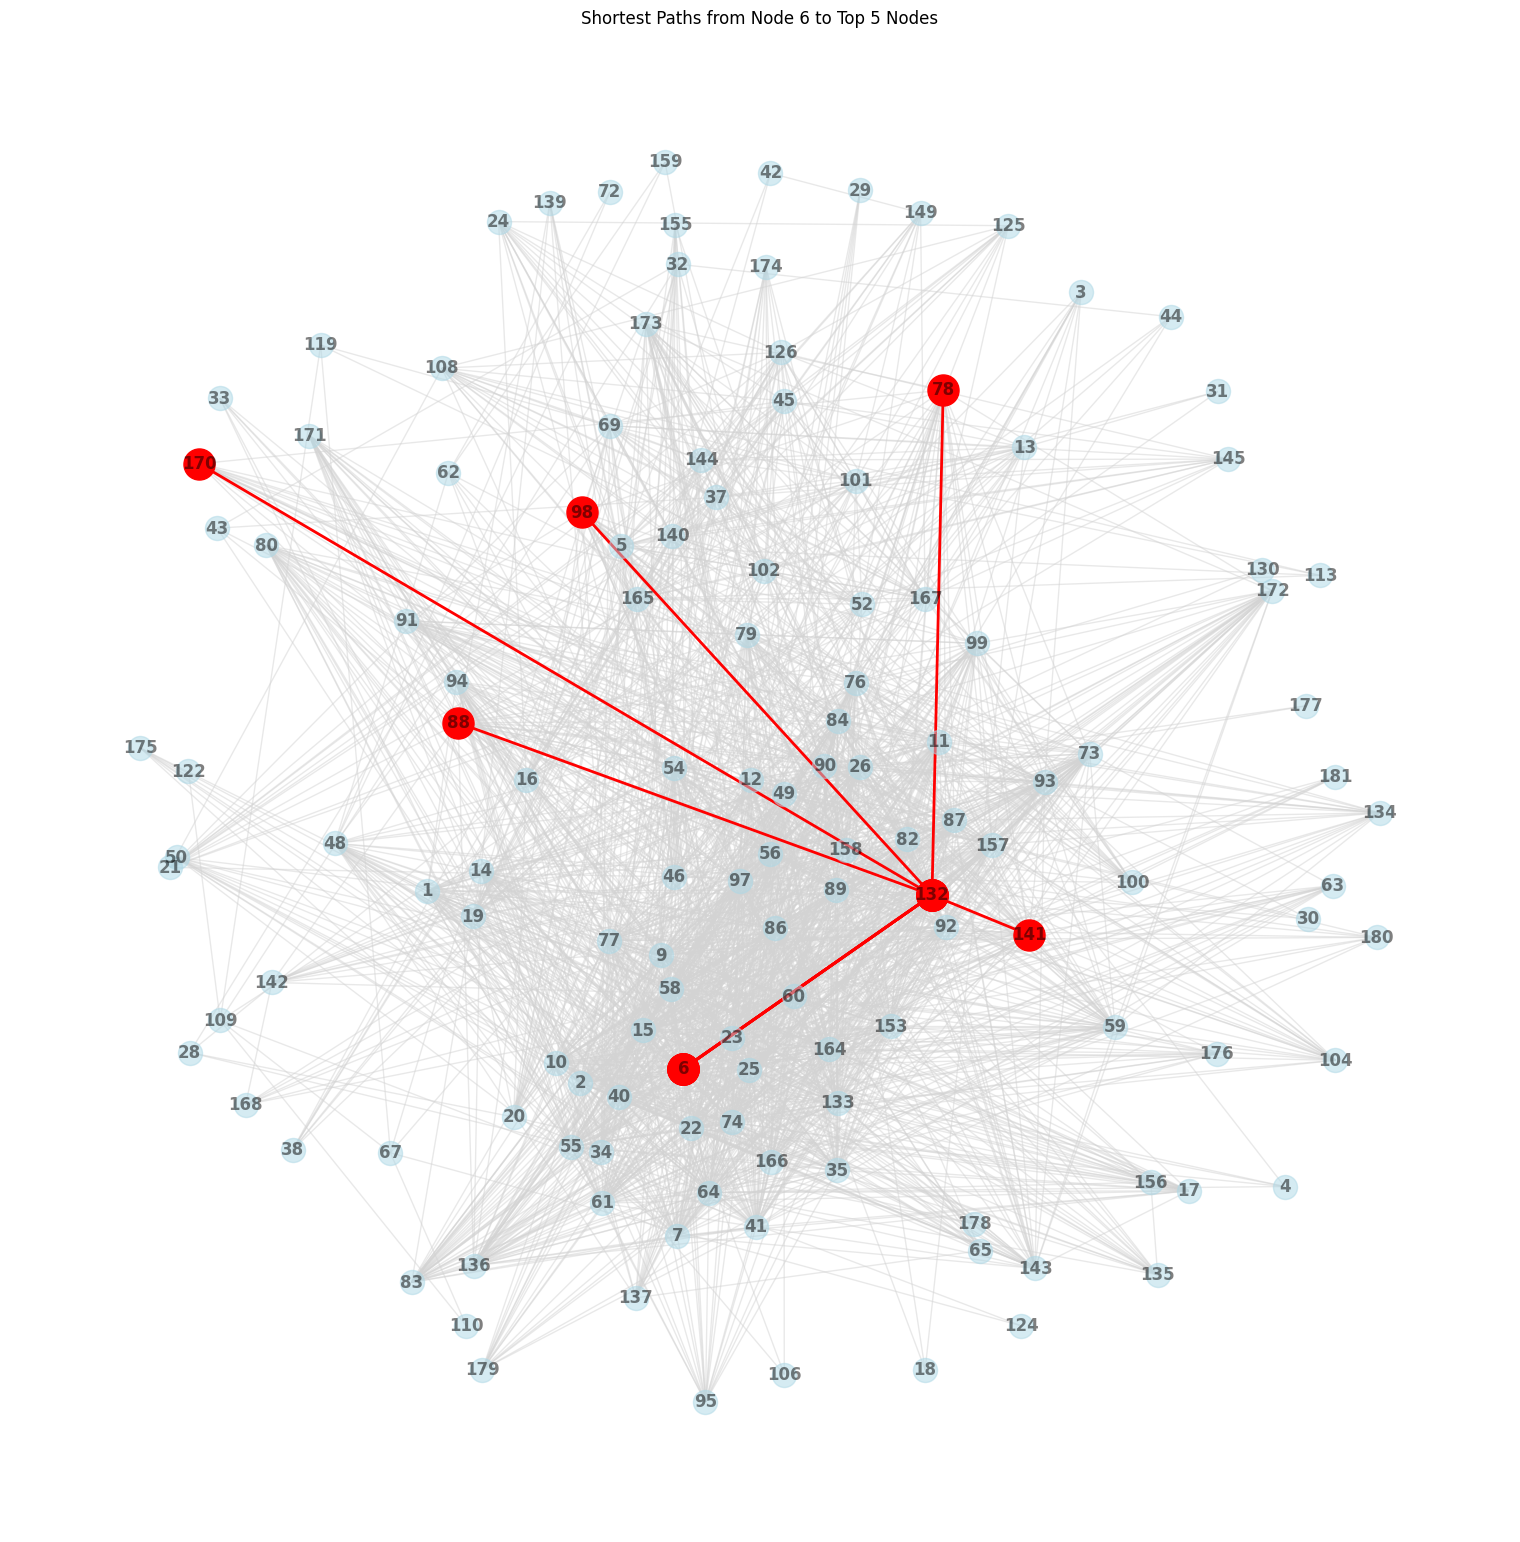

In [ ]:
source_node = 6  

# Calculate the shortest path lengths from the source node to all other nodes
shortest_path_lengths = nx.shortest_path_length(wildbird, source=source_node)

shortest_path_df = pd.DataFrame(list(shortest_path_lengths.items()), columns=['Node', 'Shortest Path Length'])

# Find the top 5 nodes with the shortest path lengths
top_5_shortest_paths = shortest_path_df.nlargest(5, 'Shortest Path Length')
print(f"Top 5 nodes with the shortest paths from node {source_node}:")
print(top_5_shortest_paths)


pos = nx.spring_layout(wildbird, k=0.5)  # Adjust k to spread nodes further apart
plt.figure(figsize=(15, 15))  # Increase the figure size


nx.draw(wildbird, pos, with_labels=True, node_color='lightblue', node_size=300, font_weight='bold', 
        edge_color='lightgray', alpha=0.5)

for target_node in top_5_shortest_paths['Node']:
    shortest_path = nx.shortest_path(wildbird, source=source_node, target=target_node)
    path_edges = list(zip(shortest_path, shortest_path[1:]))
    nx.draw_networkx_nodes(wildbird, pos, nodelist=shortest_path, node_color='red', node_size=500)
    nx.draw_networkx_edges(wildbird, pos, edgelist=path_edges, edge_color='red', width=2)

plt.title(f"Shortest Paths from Node {source_node} to Top 5 Nodes")
plt.show()